# Natural Language Processing
El procesamiento del lenguaje natural (NLP) es una rama de la inteligencia artificial que permite a las máquinas entender, interpretar y manipular el lenguaje humano. En esta notebook, nos enfocaremos en el análisis de sentimientos, una aplicación común de NLP que busca determinar la polaridad emocional de un texto. Utilizaremos el dataset de IMDb, que contiene reseñas de películas etiquetadas como positivas o negativas.

# Caso Análisis de Sentimientos

## Herramientas de Procesamiento de Lenguaje Natural y Análisis de Texto

### NLTK (Natural Language Toolkit)
NLTK es una biblioteca líder para la programación en Python de procesos del lenguaje humano. Proporciona interfaces fáciles de usar a más de 50 recursos léxicos corporales y léxicos, como WordNet, junto con una suite de bibliotecas de procesamiento de texto para la clasificación, tokenización, stemming, etiquetado, análisis sintáctico y razonamiento semántico. Es adecuado tanto para investigadores académicos como para desarrolladores industriales.

### Gensim
Gensim es una biblioteca de Python para modelado de temas y procesamiento de lenguaje natural, específicamente diseñada para descubrir la estructura semántica de documentos analizando las relaciones estadísticas entre palabras. Permite al usuario manejar grandes colecciones de texto utilizando algoritmos de espacio vectorial como LDA y similaridades de documentos. Es muy eficiente y escalable, y se utiliza comúnmente en la industria y la academia para tareas de modelado de temas y similitudes de documentos.

### BeautifulSoup
BeautifulSoup es una biblioteca que facilita raspar información de páginas web, permitiendo el parseo de documentos HTML y XML. Se utiliza comúnmente para tareas de web scraping debido a su capacidad para transformar documentos HTML complejos en un árbol de objetos Python comprensible y navegable. Esto permite a los usuarios acceder a elementos específicos del documento de forma rápida y extraer datos de manera eficiente.

Estas herramientas son fundamentales en el campo del procesamiento del lenguaje natural y el análisis de texto, proporcionando capacidades que abarcan desde la preparación y limpieza de texto hasta el análisis avanzado y modelado de temas.


# Preparación del entorno

In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

# Configuración visual para los gráficos
sns.set(style="whitegrid")

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Carga de datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Asegúrate de usar la ruta correcta a tu archivo
file_path = '/content/drive/MyDrive/M 1000 IA- equipo 1/ryanair_reviews.csv'

df = pd.read_csv(file_path)


In [5]:
import pandas as pd
#df=pd.read_csv('ryanair_reviews (1) (1).csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity'],
      dtype='object')

In [7]:
df["reviews"]= df["Comment title"]+df["Comment"]

In [8]:

df["reviews"]

0       "lack of responsibility"It was really bad, aft...
1       "a classic rip off" We booked a Ryanair flight...
2       “refused to book me onto another flight”We all...
3       “lost my luggage on a direct flight”Ryanair lo...
4       "incompetent to help passengers"Booked Basel t...
                              ...                        
2257    Ryanair customer reviewMyself and my daughter ...
2258    Ryanair customer reviewStansted to Pula. Tried...
2259    Ryanair customer reviewWhen printing the board...
2260    Ryanair customer reviewBudapest - Manchester a...
2261    Ryanair customer reviewStansted to Barcelona. ...
Name: reviews, Length: 2262, dtype: object

# Análisis Exploratorio de Datos (EDA)


El análisis exploratorio de datos nos permite entender mejor la naturaleza de los datos con los que estamos trabajando. Exploraremos la distribución de las reseñas positivas y negativas y visualizaremos las palabras más comunes en cada tipo de reseña.



In [9]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity', 'reviews'],
      dtype='object')

In [10]:
df['Overall Rating'].value_counts()

Overall Rating
1.0     865
10.0    263
8.0     198
2.0     184
9.0     177
7.0     123
3.0     103
5.0      84
6.0      77
4.0      57
Name: count, dtype: int64

In [11]:
# todos los missing
df["reviews"]= df["reviews"].fillna("Missing")

In [12]:
def f(row):

    '''This function returns sentiment value based on the overall ratings from the user'''

    if row['Overall Rating'] <= 5.0:
        val = 'Negativo'
    elif row['Overall Rating'] >5.0:
        val = 'Positive'
    else:
        val = "Missing"
    return val
  #Applying the function in our new column
df['sentiment'] = df.apply(f, axis=1)

In [13]:
df['sentiment'].value_counts()

sentiment
Negativo    1293
Positive     838
Missing      131
Name: count, dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity', 'reviews', 'sentiment'],
      dtype='object')

# Analisis de las fechas

In [15]:
import pandas as pd

# Asegurarse de que la columna 'Date Published' esté en formato datetime
df['Date Published'] = pd.to_datetime(df['Date Published'])

# Extraer el año, mes y día
df['year'] = df['Date Published'].dt.year
df['month'] = df['Date Published'].dt.month
df['day'] = df['Date Published'].dt.day

# Eliminar la columna original 'Date Published' si es necesario
df = df.drop(['Date Published'], axis=1)


In [16]:
# Arreglo la fecha de vuelo
import pandas as pd

# Asegurarse de que la columna 'Date Published' esté en formato datetime
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

# Extraer el año, mes y día
df['year_vuelo'] = df['Date Flown'].dt.year
df['month_vuelo'] = df['Date Flown'].dt.month
df['day_vuelo'] = df['Date Flown'].dt.day

# Eliminar la columna original 'Date Published' si es necesario
df = df.drop(['Date Flown'], axis=1)


<ipython-input-16-2a23eaf20a1b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Flown'] = pd.to_datetime(df['Date Flown'])


# Analisis de distribucion de calificaciones

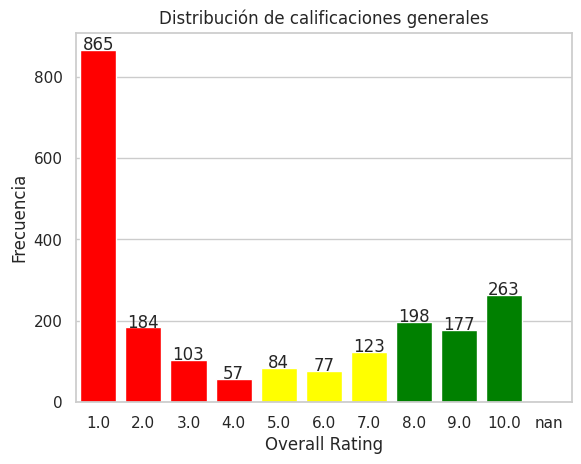

In [17]:
# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el gráfico de barras
sns.countplot(x='Overall Rating', data=df, order=sorted(df['Overall Rating'].unique()), ax=ax)

# Aplicar los colores a las barras
for patch in ax.patches:
    value = int(patch.get_x() + patch.get_width() / 2.0 + 0.5)  # Ajuste para obtener el valor correcto
    if value <= 3:
        patch.set_facecolor('red')
    elif 4 <= value <= 6:
        patch.set_facecolor('yellow')
    else:
        patch.set_facecolor('green')

    # Agregar la cuenta de frecuencia sobre cada barra
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2., height + 0.1,
            '{:.0f}'.format(height), ha="center")

plt.title('Distribución de calificaciones generales')
plt.xlabel('Overall Rating')
plt.ylabel('Frecuencia')
plt.show()

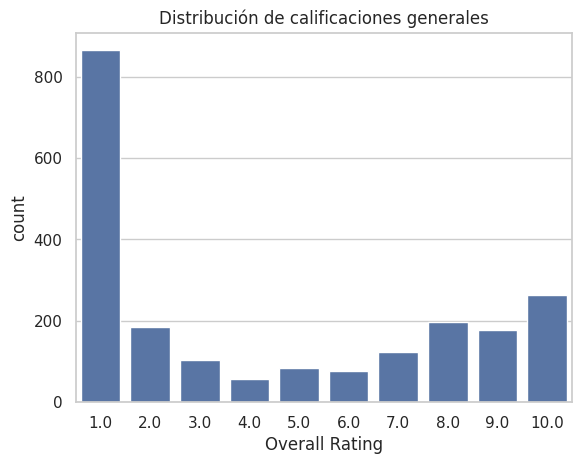

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para mostrar la distribución de calificaciones generales
sns.countplot(x='Overall Rating', data=df)
plt.title('Distribución de calificaciones generales')
plt.show()


# Analisis de sentimiento

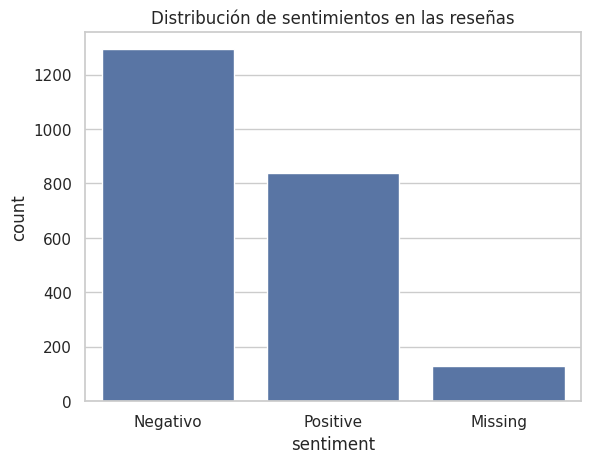

In [19]:
# Suponiendo que la columna 'sentiment' ya contiene valores como 'positive', 'neutral', 'negative'
sns.countplot(x='sentiment', data=df)
plt.title('Distribución de sentimientos en las reseñas')
plt.show()


# Analisis de calificacion y tipo de pasajero

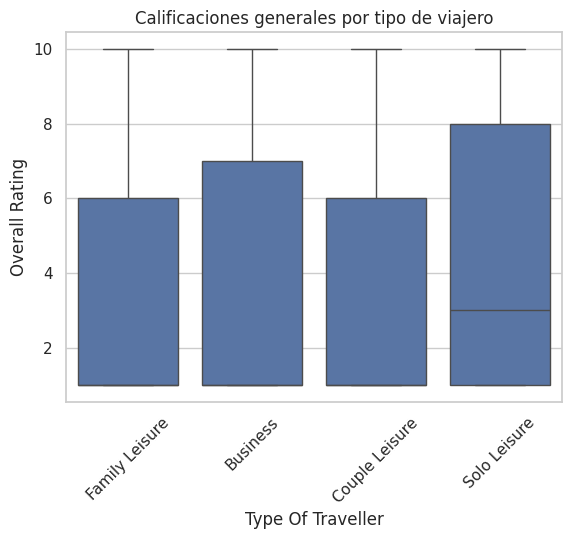

In [20]:
sns.boxplot(x='Type Of Traveller', y='Overall Rating', data=df)
plt.title('Calificaciones generales por tipo de viajero')
plt.xticks(rotation=45)
plt.show()


In [ ]:


 # Ejemplo con el origen
sns.boxplot(x='Origin', y='Overall Rating', data=df)
plt.title('Calificaciones generales por aeropuerto de origen')
plt.xticks(rotation=90)
plt.show()


Calidad precio

In [ ]:
sns.boxplot(x='Value For Money', y='Overall Rating', data=df)
plt.title('Calificaciones generales por percepción de relación calidad-precio')
plt.show()


In [ ]:
df.columns

# 6. Análisis de comentarios textuales
Para los comentarios, puedes usar técnicas de procesamiento de lenguaje natural (NLP) para extraer temas y realizar un análisis de sentimientos más detallado.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Lista de palabras que quieres excluir
excluded_words = {'Ryanair', 'flight', "u", 'flights', 'airline', "airport", 'not', "and", "the", "for", "that"}

# Unir todos los comentarios en una sola cadena
text = " ".join(review for review in df.reviews.dropna())

# Añadir las palabras excluidas al conjunto de stopwords
stopwords = set(STOPWORDS).union(excluded_words)

# Generar una nube de palabras
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)

# Mostrar la imagen generada
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Limpieza de los comentarios y eliminar los stopwords

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto de las reseñas
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()  # Convertir el texto a minúsculas
    text = re.sub('\[.*?\]', '', text)  # Eliminar texto dentro de corchetes
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Eliminar enlaces
    text = re.sub('<.*?>+', '', text)  # Eliminar etiquetas HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Eliminar puntuación
    text = re.sub('\n', '', text)  # Eliminar saltos de línea
    text = re.sub('\w*\d\w*', '', text)  # Eliminar palabras que contienen números
    return text

# Aplicar la función de limpieza a la columna 'Comment' y crear una nueva columna 'Comment_cleaner'
df['Comment_cleaner'] = df['reviews'].apply(lambda x: review_cleaning(x))

# Eliminar stopwords
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


# Year vs Sentiment count¶
In this block we will see how many reviews were posted based on sentiments in each year from 2012 to 2014

In [ ]:
df.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [ ]:
df.groupby(["year_vuelo",'sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year del vuelo and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

# Day of month vs Reviews count
Let's check if there are any relationship between reviews and day of month

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame que agrupa los comentarios por día y cuenta el número de comentarios
day = pd.DataFrame(df.groupby('day')['Comment_cleaner'].count()).reset_index()

# Asegurarse de que la columna 'day' sea de tipo entero
day['day'] = day['day'].astype('int64')

# Ordenar los valores por día
day = day.sort_values(by=['day'])

# Establecer el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Plotear el gráfico de barras con diferentes colores para cada barra
palette = sns.color_palette("husl", len(day))  # Seleccionar una paleta de colores
sns.barplot(x="day", y='Comment_cleaner', data=day, palette=palette)

# Añadir títulos y etiquetas a los ejes
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()


# Estimación de la polaridad de las reseñas

In [ ]:
from textblob import TextBlob

# Calcular la polaridad de las reseñas limpias
df['polarity'] = df['Comment_cleaner'].map(lambda text: TextBlob(text).sentiment.polarity)

# Calcular la longitud de las reseñas limpias
df['review_len'] = df['Comment_cleaner'].astype(str).apply(len)

# Calcular el conteo de palabras en las reseñas limpias
df['word_count'] = df['Comment_cleaner'].apply(lambda x: len(str(x).split()))


In [ ]:
# Mostrar las primeras filas del DataFrame modificado
df.head()

# Estimacióon de polaridad

#Sentiment polarity distribution
Let's look at our polarity distribution

In [ ]:
#!pip install cufflinks plotly

In [ ]:
# Instalación de las librerías necesarias (ejecutar solo si no están instaladas)


# Importar las librerías necesarias
import pandas as pd
import cufflinks as cf
from plotly.offline import init_notebook_mode
import plotly.io as pio

# Configuración de cufflinks y plotly para Google Colab
cf.go_offline()
init_notebook_mode(connected=True)
pio.renderers.default = 'colab'

# Suponiendo que df ya tiene la columna 'polarity'
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Analisis de polaridad',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution'
)


Interpretación del Histograma de Polaridad de Sentimiento
Distribución de la Polaridad:

La mayoría de las reseñas están concentradas alrededor de la polaridad 0, que indica que muchas reseñas son neutras en términos de sentimiento.
Hay una distribución asimétrica con una ligera inclinación hacia el lado positivo (polaridad > 0). Esto sugiere que, aunque hay muchas reseñas neutras, también hay un número considerable de reseñas positivas.
Hay menos reseñas con polaridad negativa, indicando que menos usuarios expresan sentimientos muy negativos en sus comentarios.


Reseñas Extremadamente Positivas o Negativas:

La polaridad en los extremos (-1 y 1) tiene muy pocos comentarios. Esto es normal en muchos conjuntos de datos de reseñas, ya que los comentarios extremadamente positivos o negativos son menos comunes.
Análisis Adicional
Para un análisis más profundo, podríamos observar la relación entre la polaridad del sentimiento y otras variables en el conjunto de datos. Aquí te dejo algunas ideas de análisis adicionales y cómo podrías implementarlos:

In [ ]:
# Análisis de la relación entre polaridad y calificación general
sns.scatterplot(x='Overall Rating', y='polarity', data=df)
plt.title('Polaridad vs. Calificación general')
plt.xlabel('Calificación general')
plt.ylabel('Polaridad')
plt.show()

# Análisis de la relación entre polaridad y tipo de viajero
sns.boxplot(x='Type Of Traveller', y='polarity', data=df)
plt.title('Polaridad vs. Tipo de viajero')
plt.xlabel('Tipo de viajero')
plt.ylabel('Polaridad')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df["sentiment"].unique()

# analisis entre polaridad y overall rating y sentiment analisis para decidir cual es y

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión entre polaridad y calificación general
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Rating', y='polarity', data=df)
plt.title('Polaridad vs. Calificación General')
plt.xlabel('Calificación General')
plt.ylabel('Polaridad')
plt.show()

# Boxplot entre polaridad y calificación general
plt.figure(figsize=(12, 8))
sns.boxplot(x='Overall Rating', y='polarity', data=df)
plt.title('Distribución de la Polaridad para cada Calificación General')
plt.xlabel('Calificación General')
plt.ylabel('Polaridad')
plt.show()

# Función para clasificar el sentimiento basado en la polaridad
def classify_sentiment(row):
    if (row["polarity"] < 0 and row["Recommended"]=="no"):
        return 'Negativo'
    elif row["Recommended"]=="no":
        return 'Negativo'
    elif ["polarity"] == 0:
        return 'Neutral'
    elif row["Recommended"]=="yes":
        return 'Positivo'
    elif (row["polarity"] > 0 and row["Recommended"]=="yes"):
        return 'Positivo'
    else:
        return 'Positivo'
# Crear una nueva columna para la clasificación del sentimiento
df['Sentiment_polarity'] = df.apply(classify_sentiment, axis=1)

# Gráfico de barras para la distribución de calificaciones generales por sentimiento
plt.figure(figsize=(12, 8))
sns.countplot(x='Overall Rating', hue='Sentiment_polarity', data=df)
plt.title('Distribución de Calificaciones Generales por Sentimiento')
plt.xlabel('Calificación General')
plt.ylabel('Número de Comentarios')
plt.legend(title='Sentimiento')
plt.show()


In [ ]:
df.columns

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


data = pd.DataFrame(df)
# Lista de palabras que quieres excluir
excluded_words = {'Ryanair', 'flight', "u", 'flights', 'airline', "airport", 'not', "and", "the", "for", "that"}

# Añadir las palabras excluidas al conjunto de stopwords
stopwords = set(STOPWORDS).union(excluded_words)

def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Unir todos los comentarios en una sola cadena para cada categoría de Sentiment_polarity
positive_text = " ".join(review for review in data[data['Sentiment_polarity'] == 'Positivo']['Comment_cleaner'].dropna())
#neutral_text = " ".join(review for review in data[data['Sentiment_polarity'] == 'Neutral']['Comment_cleaner'].dropna())
negative_text = " ".join(review for review in data[data['Sentiment_polarity'] == 'Negativo']['Comment_cleaner'].dropna())

# Generar y mostrar la nube de palabras para cada categoría
generate_wordcloud(positive_text, "Nube de Palabras - Reseñas Positivas")
#generate_wordcloud(neutral_text, "Nube de Palabras - Reseñas Neutrales")
generate_wordcloud(negative_text, "Nube de Palabras - Reseñas Negativas")


Interpretación del Gráfico de Distribución de Calificaciones Generales por Sentimiento
El gráfico de barras muestra la distribución de las calificaciones generales (de 1 a 10) segmentadas por el sentimiento (Negativo, Neutral y Positivo).

Observaciones Clave
Calificaciones Muy Bajas (1-2):

Negativo: Hay una gran cantidad de comentarios con calificación 1 que están clasificados como negativos. Esto sugiere que los pasajeros que tuvieron una experiencia muy mala suelen expresar sus sentimientos negativos claramente.
Positivo: Hay algunos comentarios clasificados como positivos en calificaciones bajas, lo cual podría indicar inconsistencias en las reseñas o aspectos específicos que fueron valorados positivamente a pesar de la mala experiencia general.
Neutral: Hay muy pocos comentarios neutros en las calificaciones más bajas.
Calificaciones Medias (3-7):

Negativo: La presencia de comentarios negativos disminuye a medida que aumenta la calificación.
Positivo: A partir de la calificación 6, comienzan a aparecer más comentarios positivos, especialmente en la calificación 7.
Neutral: Hay una presencia constante, aunque baja, de comentarios neutros.
Calificaciones Altas (8-10):

Positivo: La mayoría de los comentarios con calificaciones altas están clasificados como positivos, especialmente en las calificaciones 8, 9 y 10. Esto indica que los pasajeros que tuvieron una experiencia muy buena tienden a expresar sentimientos positivos.
Negativo: Hay una pequeña cantidad de comentarios negativos incluso en las calificaciones más altas, lo cual podría deberse a aspectos específicos que no fueron del agrado del pasajero.
Neutral: Hay muy pocos comentarios neutros en las calificaciones más altas.

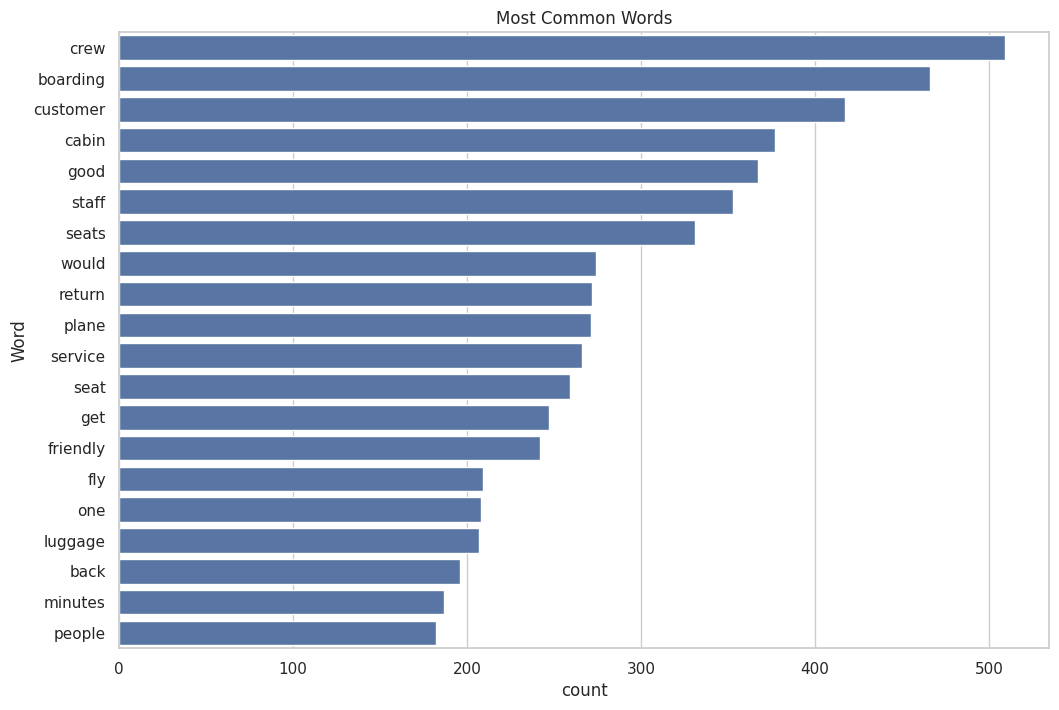

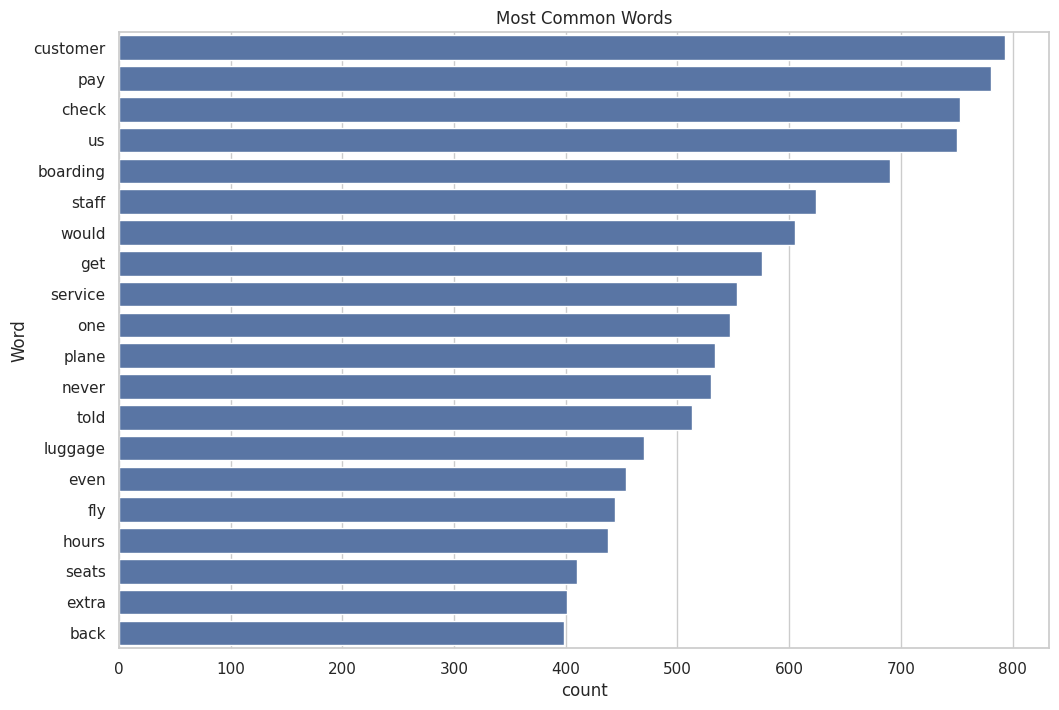

In [ ]:
# Lista de palabras que deseas excluir
excluded_words = {'this', 'is', 'and', 'i', "time", 'Ryanair', "ryanair", 'flight', "u", 'flights',
                  'airline', "airport", 'not', "and", "the", "for", "that"}

# Función para limpiar el texto
def clean_text(text, excluded_words):
    return ' '.join([word for word in text.split() if word.lower() not in excluded_words])

# Aplicar la función de limpieza al DataFrame
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: clean_text(x, excluded_words))

# Función para graficar las palabras más frecuentes
def plot_most_common_words(text, n=20):
    words = ' '.join(text).split()
    freq_dist = nltk.FreqDist(words)
    words_df = pd.DataFrame({'word': list(freq_dist.keys()), 'count': list(freq_dist.values())})
    d = words_df.nlargest(columns='count', n=n)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=d, x='count', y='word')
    ax.set(ylabel='Word')
    plt.title('Most Common Words')
    plt.show()

# Visualización de palabras más comunes en reseñas positivas
positive_reviews = df[df['Sentiment_polarity'] == 'Positivo']['Comment_cleaner']
plot_most_common_words(positive_reviews)

# Visualización de palabras más comunes en reseñas neutrales
#neutral_reviews = df[df['Sentiment_polarity'] == 'Neutral']['Comment_cleaner']
#plot_most_common_words(neutral_reviews)

# Visualización de palabras más comunes en reseñas negativas
negative_reviews = df[df['Sentiment_polarity'] == 'Negativo']['Comment_cleaner']
plot_most_common_words(negative_reviews)

Sentiment_polarity
Negativo    1387
Positivo     875
Name: count, dtype: int64


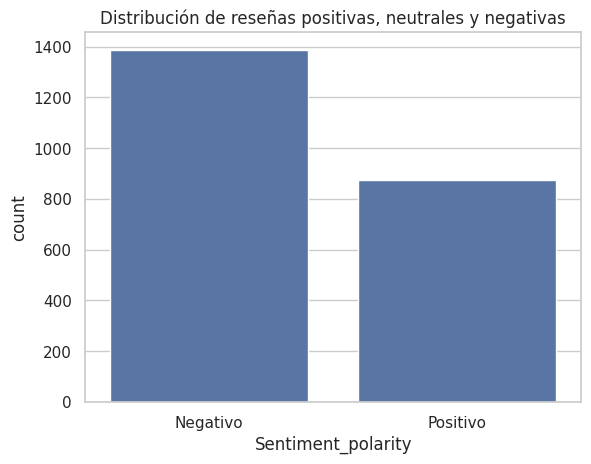

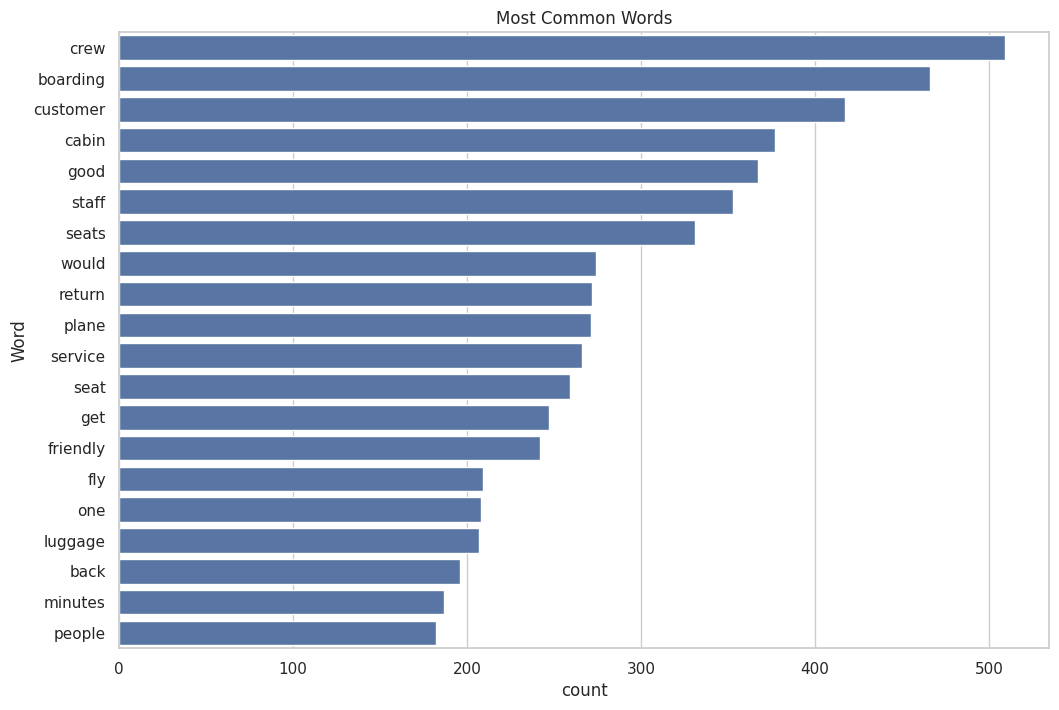

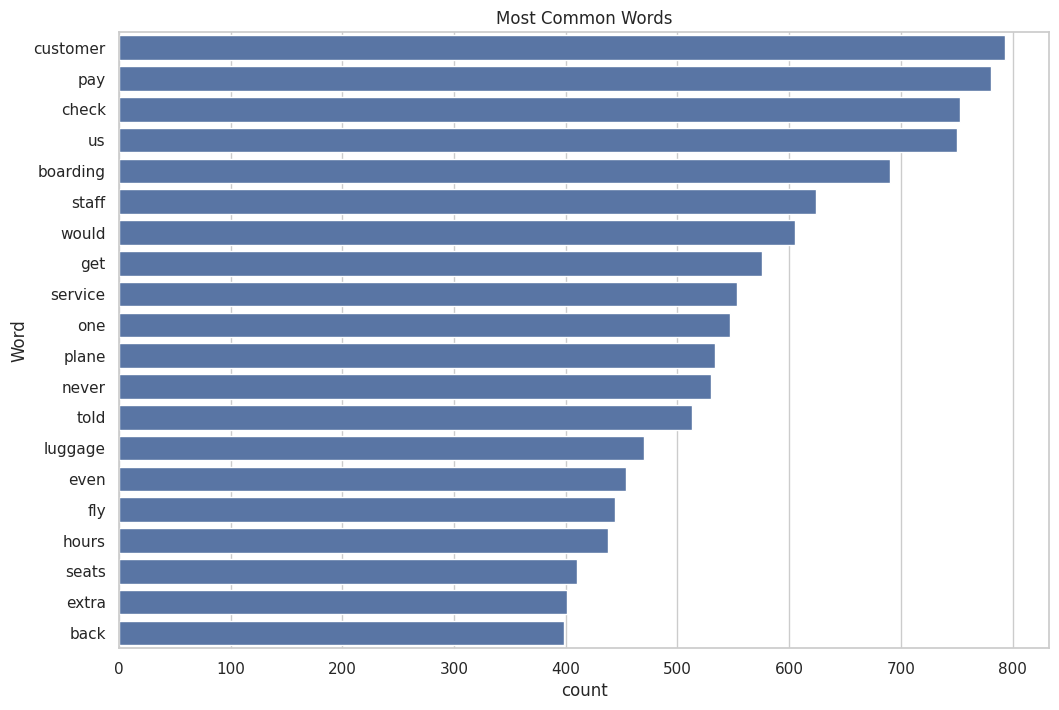

In [ ]:
# Conteo de valores para ver el balance de clases
print(df['Sentiment_polarity'].value_counts())

# Gráfico de barras para mostrar la distribución de reseñas positivas y negativas
sns.countplot(x='Sentiment_polarity', data=df)
plt.title('Distribución de reseñas positivas, neutrales y negativas')
plt.show()


# Función para graficar las palabras más frecuentes
def plot_most_common_words(text, n=20):
    words = ' '.join(text).split()  # Asegúrate de que 'text' no está vacío
    freq_dist = nltk.FreqDist(words)
    words_df = pd.DataFrame({'word': list(freq_dist.keys()), 'count': list(freq_dist.values())})
    d = words_df.nlargest(columns='count', n=n)  # Selecciona las n palabras más frecuentes
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=d, x='count', y='word')
    ax.set(ylabel='Word')
    plt.title('Most Common Words')
    plt.show()

# Visualización de palabras más comunes en reseñas positivas
positive_reviews = df[df['Sentiment_polarity']== 'Positivo']['Comment_cleaner']
plot_most_common_words(positive_reviews)

# Visualización de palabras más comunes en reseñas negativas
#neutrals_reviews = df[df['Sentiment_polarity']== 'Neutral']['Comment_cleaner']
#plot_most_common_words(neutrals_reviews)

# Visualización de palabras más comunes en reseñas negativas
negative_reviews = df[df['Sentiment_polarity']== 'Negativo']['Comment_cleaner']
plot_most_common_words(negative_reviews)

# VOLVER A EJECUTAR LUEGO DEL TEXT CLEANING

#Análisis de Bigrama

In [ ]:
from collections import defaultdict
from nltk import ngrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

# Configurar Plotly para trabajar en Google Colab
pyo.init_notebook_mode(connected=True)

# Función para generar bigramas
def generate_ngrams(text, n):
    words = text.split()
    return [' '.join(gram) for gram in ngrams(words, n)]

# Función para crear gráficos de barras horizontales
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df['word'],
        x=df['wordcount'],
        orientation='h',
        marker=dict(
            color=color,
        )
    )
    return trace

# Filtrar las reseñas por sentimiento
review_pos = df[df['Sentiment_polarity'] == 'Positivo']
#review_neu = df[df['Sentiment_polarity'] == 'Neutral']
review_neg = df[df['Sentiment_polarity'] == 'Negativo']

# Gráfico de bigramas para reseñas positivas
freq_dict = defaultdict(int)
for sent in review_pos["Comment_cleaner"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

# # Gráfico de bigramas para reseñas neutras
# freq_dict = defaultdict(int)
# for sent in review_neu["Comment_cleaner"]:
#     for word in generate_ngrams(sent, 2):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

# Gráfico de bigramas para reseñas negativas
freq_dict = defaultdict(int)
for sent in review_neg["Comment_cleaner"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')

# Crear subplots
fig = make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                    subplot_titles=["Bigram plots of Positive reviews",
                                    #"Bigram plots of Neutral reviews",
                                    "Bigram plots of Negative reviews"])

fig.add_trace(trace0, row=1, col=1)
#fig.add_trace(trace1, row=2, col=1)
fig.add_trace(trace2, row=2, col=1)

fig.update_layout(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")

In [ ]:
#pip install -U kaleido

In [ ]:
# Guardar el gráfico como un archivo HTML
fig.write_html("bigrams.html")

# Mostrar el archivo HTML en Google Colab
from IPython.display import display, HTML

display(HTML("bigrams.html"))




# Analysis Trigram Plot

In [ ]:
import pandas as pd
from collections import defaultdict
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from IPython.display import display, HTML

def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df['word'],
        x=df['wordcount'],
        orientation='h',
        marker=dict(color=color),
    )
    return trace


# Obtener el gráfico de barras de reviews positivas
freq_dict = defaultdict(int)
for sent in review_pos["Comment_cleaner"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted_pos.head(25), 'green')

# # Obtener el gráfico de barras de reviews neutras
# freq_dict = defaultdict(int)
# for sent in review_neu["Comment_cleaner"]:
#     for word in generate_ngrams(sent, 3):
#         freq_dict[word] += 1
# fd_sorted_neu = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted_neu.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted_neu.head(25), 'grey')

# Obtener el gráfico de barras de reviews negativas
freq_dict = defaultdict(int)
for sent in review_neg["Comment_cleaner"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted_neg.head(25), 'red')

# Crear los subplots
fig = make_subplots(rows=3, cols=1, vertical_spacing=0.04, subplot_titles=[
    "Tri-gram plots of Positive reviews",
    #"Tri-gram plots of Neutral reviews",
    "Tri-gram plots of Negative reviews"
])

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=2, col=1)
#fig.add_trace(trace2, row=3, col=1)

fig.update_layout(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")

# Mostrar el gráfico en Google Colab
fig.show()

# Mostrar los DataFrames como tablas HTML en Google Colab
display(HTML('<h2>Top 25 Trigrams in Positive Reviews</h2>'))
display(HTML(fd_sorted_pos.head(25).to_html(index=False)))

# display(HTML('<h2>Top 25 Trigrams in Neutral Reviews</h2>'))
# display(HTML(fd_sorted_neu.head(25).to_html(index=False)))

display(HTML('<h2>Top 25 Trigrams in Negative Reviews</h2>'))
display(HTML(fd_sorted_neg.head(25).to_html(index=False)))


word,wordcount
cabin crew friendly,43
print boarding passes,21
flown many times,17
good value money,17
print boarding pass,14
printed boarding passes,13
extra leg room,13
arrived minutes early,12
customer reviewwe flew,11
great value money,11


word,wordcount
print boarding pass,54
print boarding passes,33
get boarding pass,19
worst customer service,16
terrible customer service,14
paid priority boarding,12
printing boarding pass,11
euros per person,11
tried check online,11
euro per person,11


#Extracting Features from Cleaned reviews
Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts

Encoding target variable-sentiment
Let's encode our target variable with Label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Supongamos que tienes un DataFrame 'df' con una columna 'Sentiment_polarity'

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Codificar las etiquetas en la columna 'Sentiment_polarity'
df['Sentiment_polarity'] = label_encoder.fit_transform(df['Sentiment_polarity'])

# Mostrar los valores únicos codificados
print(df['Sentiment_polarity'].unique())


[0 1]


In [ ]:
df['Sentiment_polarity'].value_counts()

Sentiment_polarity
0    1387
1     875
Name: count, dtype: int64

#Stemming the reviews
Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,

Going->go
Finally->fina
If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming

In [ ]:
#Extracting 'reviews' for processing
review_features=df.copy()
review_features['clean_review']= review_features[['Comment_cleaner']].reset_index(drop=True)

In [ ]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['clean_review'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[3]

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF

TFIDF(Term Frequency — Inverse Document Frequency)
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['clean_review'])

In [ ]:
X.shape

As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.

In [ ]:
review_features.columns

In [ ]:
#Getting the target variable(encoded)
y= review_features['Sentiment_polarity']

In [ ]:
review_features.columns

In [ ]:
review_features.to_excel("basefinal.xlsx")

In [ ]:
from google.colab import files
#files.download('basefinal.xlsx')

# Handling Imbalance target feature-SMOTE
In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situatio. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [ ]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Great, as you can see the resampled data has equally distributed classes

# Train-test split(75:25)
Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [ ]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

# Model Building: Sentiment Analysis
As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model selection¶
First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification


# Crear los objetos de los clasificadores
logreg_cv = LogisticRegression(random_state=0)
dt_cv = DecisionTreeClassifier()
knn_cv = KNeighborsClassifier()
svc_cv = SVC()
nb_cv = BernoulliNB()

# Diccionario de nombres de los clasificadores
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'KNN', 3: 'SVC', 4: 'Naive Bayes'}
# Lista de modelos
cv_models = [logreg_cv, dt_cv, knn_cv, svc_cv, nb_cv]

# Realizar validación cruzada y mostrar la precisión promedio
for i, model in enumerate(cv_models):
    accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()
    print("{} Test Accuracy: {:.2f}".format(cv_dict[i], accuracy))


**Se podría medir también la presición para ver si es mejor en todos los aspectos**

From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 70%. That's great. So let's go with logistic regression with hyperparameter tuning.

Logistic Regression with Hyperparameter tuning
We use regularization parameter and penality for parameter tuning. let's see which one to plug.

# **Gridsearch en NaiveBayes**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification

# Definir los hiperparámetros para la búsqueda en grid
param_grid = {
    'alpha': np.logspace(-4, 1, 10),  # Valores de alpha desde 0.0001 a 10
    'binarize': np.linspace(0, 1, 10)  # Valores de binarize desde 0 a 1
}

# Configurar GridSearchCV
nb_cv = BernoulliNB()
grid_search = GridSearchCV(estimator=nb_cv, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo y buscar los mejores parámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y la mejor precisión
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))


In [ ]:
# Obtener las predicciones del conjunto de prueba
y_pred = grid_search.predict(X_test)

# Imprimir las primeras 10 predicciones para referencia
print("First 10 predictions: ", y_pred[:10])

First 10 predictions:  [1 1 0 0 0 0 1 1 1 1]


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: {:.2f}".format(test_accuracy))

Test Accuracy: 0.92


#Classification metrics¶
Here we plot the confusion matrix with ROC and check our f1 score

In [ ]:
y_pred.shape, y_test.shape

((694,), (694,))

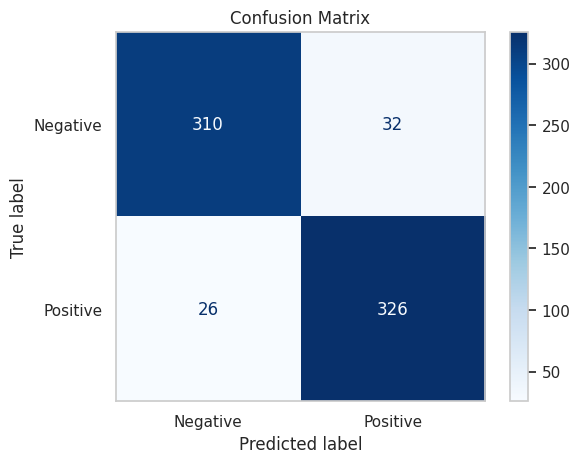

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Calcula la matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred)

# Define las clases
classes = ['Negative', 'Positive']

# Plotea la matriz de confusión
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')

# Elimina las cuadriculas
ax.grid(False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


True Negative (TN): 302 instancias fueron correctamente clasificadas como negativas.
False Negative (FN): 118 instancias positivas fueron incorrectamente clasificadas como negativas.
False Positive (FP): 40 instancias negativas fueron incorrectamente clasificadas como positivas.
True Neutral: 356 instancias fueron correctamente clasificadas como neutrales.
False Neutral: No hay instancias neutrales clasificadas incorrectamente.
True Positive (TP): 232 instancias fueron correctamente clasificadas como positivas.

In [ ]:
from sklearn.metrics import classification_report

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)


              precision    recall  f1-score   support

    Negative       0.92      0.91      0.91       342
    Positive       0.91      0.93      0.92       352

    accuracy                           0.92       694
   macro avg       0.92      0.92      0.92       694
weighted avg       0.92      0.92      0.92       694



Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified

# ROC-AUC curve
This is a very important curve where we decide on which threshold to setup based upon the objective criteria. Here we plotted ROC for different classes which can help us understand which class was classified better. Also we plot micro and macro averages on the roc curve.

In [ ]:
y_test.shape, y_pred.shape, y_score.shape

NameError: name 'y_score' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Paso 3: Obtener las predicciones del conjunto de prueba
y_score = grid_search.predict_proba(X_test)[:, 1]

# Paso 4: Calcular TPR y FPR
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Paso 5: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Imprimir las formas de y_test y y_pred para confirmar su estructura
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# Asegurarse de que y_test y y_pred están en formato correcto para desbinarizarlas
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = y_test.argmax(axis=1)
else:
    y_test_classes = y_test

if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
    y_pred_classes = y_pred.argmax(axis=1)
else:
    y_pred_classes = y_pred

# Imprimir el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['Clase 0', 'Clase 1']))

# Calcular la precisión
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy on test set: {:.2f}".format(test_accuracy))


Interpretación del Gráfico ROC Multiclase
El gráfico ROC (Receiver Operating Characteristic) presentado es una visualización comúnmente utilizada para evaluar el rendimiento de un clasificador en problemas de clasificación binaria y multiclase. Aquí te dejo una interpretación detallada del gráfico que has generado:

Curva ROC Micro-Promedio (Micro-Average ROC Curve)

Descripción: La curva micro-promedio es una agregación de las curvas ROC de todas las clases, tratándolas como si fueran una sola curva ROC.
Área Bajo la Curva (AUC): 0.86
Interpretación: El AUC de 0.86 indica que el modelo tiene un buen rendimiento general al distinguir entre todas las clases. Un valor de AUC cercano a 1 representa un rendimiento excelente, mientras que un valor cercano a 0.5 indica un rendimiento no mejor que el azar.
Curva ROC Macro-Promedio (Macro-Average ROC Curve)

Descripción: La curva macro-promedio es el promedio de las curvas ROC de todas las clases, sin considerar la frecuencia de las clases.
Área Bajo la Curva (AUC): 0.71
Interpretación: El AUC de 0.71 sugiere que, en promedio, el rendimiento del modelo es moderado. La curva macro-promedio pondera todas las clases por igual y es útil para entender el rendimiento general cuando se tienen clases desbalanceadas.
Curvas ROC por Clase

Clase 0 (Color Aqua)
AUC: 0.73
Interpretación: La clase 0 tiene un AUC de 0.73, lo que indica un buen rendimiento del modelo para esta clase específica.
Clase 1 (Color Darkorange)
AUC: 0.63
Interpretación: La clase 1 tiene un AUC de 0.63, lo que sugiere un rendimiento menor comparado con las otras clases. El modelo tiene más dificultades para distinguir correctamente esta clase.
Clase 2 (Color Cornflowerblue)
AUC: 0.74
Interpretación: La clase 2 tiene un AUC de 0.74, lo que indica un buen rendimiento del modelo para esta clase específica.
Observaciones Generales:
Ejes del Gráfico:

Eje X (Tasa de Falsos Positivos): Representa la proporción de instancias negativas que fueron clasificadas incorrectamente como positivas.
Eje Y (Tasa de Verdaderos Positivos): Representa la proporción de instancias positivas que fueron clasificadas correctamente.
Curva Diagonal (Línea Negra): Representa un clasificador aleatorio (AUC = 0.5). Las curvas ROC por encima de esta línea indican un rendimiento mejor que el azar.

Rendimiento Relativo de las Clases: El modelo tiene un rendimiento desigual entre las clases. Las clases 0 y 2 tienen un rendimiento relativamente bueno, mientras que la clase 1 muestra un rendimiento inferior.

Conclusión:
El modelo tiene un buen rendimiento general (micro-promedio AUC = 0.86), pero presenta desafíos específicos con la clase 1, que tiene un AUC más bajo (0.63). Esto podría indicar la necesidad de mejorar la representación o la separación de esta clase en el conjunto de datos, posiblemente mediante técnicas de recolección de datos adicionales, balanceo de clases, o ajuste de hiperparámetros del modelo.

Siguientes Pasos:
Revisar las características: Asegurarse de que las características utilizadas son adecuadas para distinguir entre las clases.
Balancear las clases: Considerar técnicas adicionales de balanceo de clases para mejorar el rendimiento en la clase 1.
Ajuste de Hiperparámetros: Realizar una búsqueda de hiperparámetros más exhaustiva para optimizar el rendimiento del modelo.
Ingeniería de Características: Explorar nuevas características que puedan mejorar la separación entre las clases.

In [ ]:
# Paso 1: Vectorización con TF-IDF utilizando trigramas
vectorizer_tfidf_trigram = TfidfVectorizer(max_features=5000, ngram_range=(3, 3))
X_tfidf_trigram = vectorizer_tfidf_trigram.fit_transform(review_features['clean_review'].astype(str))

In [ ]:
# Guardar el vectorizador
import joblib
from google.colab import files
from joblib import dump, load

dump(vectorizer_tfidf_trigram, 'tfidf_vectorizer.joblib')

In [ ]:
from google.colab import files
files.download('tfidf_vectorizer.joblib')

In [ ]:
from joblib import dump, load
# Luego descarga el archivo desde Colab
from google.colab import files

# Suponiendo que tu modelo se llama `logreg`
dump(grid_search, 'naive_model.joblib')
files.download('naive_model.joblib')


In [ ]:
train_df= X_train.copy()

# Extracción de Características: vectorización


Convertiremos el texto limpio en formatos numéricos que los modelos de machine learning pueden procesar utilizando diferentes técnicas de vectorización.

### Comparativa de Métodos de Extracción de Características
- **Bag of Words**: Crea un vocabulario de todas las palabras únicas en el dataset y usa la frecuencia de las palabras como características. Es simple pero efectiva para muchos problemas de NLP.
- **TF-IDF**: Similar a BoW pero ajusta las frecuencias según la importancia de las palabras en los documentos. Es útil para resaltar palabras que son más relevantes en un contexto específico.

Ambas técnicas tienen sus ventajas y son ampliamente utilizadas en tareas de NLP. La elección entre ellas depende del contexto específico y de los objetivos del análisis.

## Visualización de características para cada review - BoW

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(2, 2))
X = tfidf_vectorizer.fit_transform(review_features['clean_review'])

# Obtener las características (bigramas)
features_tfidf = tfidf_vectorizer.get_feature_names_out()

# Comparación de características extraídas
print("Número de características en TF-IDF:", X.shape[1])


Visualización de las Características:

Convierte la matriz dispersa a DataFrame utilizando pd.DataFrame() para una mejor interpretación.
Muestra las primeras filas del DataFrame resultante para visualizar las características (bigramas) y sus valores TF-IDF para algunas reseñas.

In [ ]:
import pandas as pd

# Convertir la matriz dispersa a DataFrame para una visualización más clara
df_tfidf = pd.DataFrame(X.toarray(), columns=features_tfidf)

# Mostrar las primeras reseñas y sus características
print("Características de las primeras reseñas (TF-IDF):")



In [ ]:
df_tfidf.head()

1. Identificar Términos Más Importantes por Documento
Puedes identificar los términos más importantes (con mayor peso TF-IDF) en cada documento.

In [ ]:
# Encontrar los términos más importantes en el primer documento
top_n = 10  # Número de términos más importantes a mostrar
first_doc_tfidf = df_tfidf.iloc[0]
top_terms = first_doc_tfidf.sort_values(ascending=False).head(top_n)
print("Términos más importantes en el primer documento:")
print(top_terms)


# **2. Distribución de Puntuaciones TF-IDF**
Analiza la distribución de las puntuaciones TF-IDF para ver cómo se distribuyen las puntuaciones en todo el corpus.

In [ ]:
import matplotlib.pyplot as plt

# Obtener todas las puntuaciones TF-IDF no nulas
tfidf_values = X.data

# Graficar la distribución de puntuaciones TF-IDF
plt.hist(tfidf_values, bins=50, color='blue', alpha=0.7)
plt.title('Distribución de Puntuaciones TF-IDF')
plt.xlabel('Puntuación TF-IDF')
plt.ylabel('Frecuencia')
plt.show()


# 3. Análisis de Términos Globales
Analiza los términos globales más importantes en todo el corpus para identificar patrones comunes.

In [ ]:
# Sumar las puntuaciones TF-IDF para cada término a lo largo de todos los documentos
global_tfidf = df_tfidf.sum(axis=0).sort_values(ascending=False)

# Mostrar los términos globales más importantes
print("Términos globales más importantes en todo el corpus:")
print(global_tfidf.head(10))


# 4. Visualización de Palabras Clave con Word Cloud
Genera una nube de palabras para visualizar las palabras clave más frecuentes y sus pesos.

In [ ]:
from wordcloud import WordCloud

# Crear una representación de las palabras y sus pesos
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(global_tfidf.to_dict())

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Clave (TF-IDF)')
plt.show()


# 5. Análisis de Similaridad de Documentos
Usa la matriz TF-IDF para calcular la similitud entre documentos.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similitud del coseno entre los documentos
cosine_similarities = cosine_similarity(X)

# Mostrar la similitud entre el primer documento y los demás
print("Similitud del coseno entre el primer documento y los demás:")
print(cosine_similarities[0])


6. Clustering de Documentos
Usa la matriz TF-IDF para agrupar documentos en clusters.

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters
num_clusters = 5

# Ajustar el modelo KMeans
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X)

# Mostrar los clusters de algunos documentos
print("Clusters asignados a los primeros documentos:")
print(km.labels_[:10])


# 7. Clasificación de Documentos
Usa la matriz TF-IDF como entrada para un modelo de clasificación de documentos.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Paso 2: Entrenar el modelo de Bernoulli Naive Bayes
clf = BernoulliNB()
clf.fit(X_train, y_train)

# Paso 3: Predecir y evaluar el modelo
y_pred = clf.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión del modelo: {:.2f}".format(accuracy_score(y_test, y_pred)))

# Paso 4: Obtener las predicciones del conjunto de prueba (probabilidades)
y_score = clf.predict_proba(X_test)[:, 1]

# Paso 5: Calcular TPR y FPR
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()



# Analisis

In [ ]:
import plotly.express as px
import plotly.io as pio

# Configurar el renderizador para Plotly en Colab
pio.renderers.default = 'colab'


import plotly.express as px
import plotly.io as pio

# Configurar el renderizador para Plotly en Colab
pio.renderers.default = 'colab'


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(2, 2))
X_tfidf = tfidf_vectorizer.fit_transform(review_features['clean_review'])

# Obtener las características (bigramas)
features_tfidf = tfidf_vectorizer.get_feature_names_out()

print("Número de características en TF-IDF:", X_tfidf.shape[1])



In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters
num_clusters = 5

# Ajustar el modelo KMeans
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X_tfidf)

# Obtener los clusters asignados a cada documento
clusters = km.labels_.tolist()

print("Número de clusters:", len(clusters))



In [ ]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales para la visualización
pca = PCA(n_components=10, random_state=42)
pca_result = pca.fit_transform(X_tfidf.toarray())

# Crear un DataFrame con los documentos y sus coordenadas PCA
import pandas as pd

# Verifica que las longitudes coincidan
print("Número de documentos:", len(review_features['clean_review']))
print("Número de puntos PCA:", pca_result.shape[0])
print("Número de clusters:", len(clusters))

df_pca = pd.DataFrame({
    'document': range(pca_result.shape[0]),
    'cluster': clusters,
    'pca1': pca_result[:, 0],
    'pca2': pca_result[:, 1]
})



In [ ]:
import plotly.express as px

# Crear un gráfico de dispersión interactivo con Plotly
fig = px.scatter(df_pca, x='pca1', y='pca2', color='cluster', hover_data=['document'], title='Clusters de Documentos (TF-IDF + KMeans)')

# Mostrar el gráfico
fig.show()


# Visuaizacion en 3D

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(2, 2))
X_tfidf = tfidf_vectorizer.fit_transform(review_features['clean_review'].astype(str))

# Obtener las características (bigramas)
features_tfidf = tfidf_vectorizer.get_feature_names_out()

print("Número de características en TF-IDF:", X_tfidf.shape[1])
print("Número de características extraídas:", len(features_tfidf))


In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters
num_clusters = 5

# Ajustar el modelo KMeans
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X_tfidf.T)  # Transpuesta para agrupar términos en lugar de documentos

# Obtener los clusters asignados a cada término
clusters = km.labels_.tolist()

print("Número de clusters:", len(clusters))


In [ ]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 3 componentes principales para la visualización
pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(X_tfidf.T.toarray())  # Transpuesta para reducir términos en lugar de documentos

# Crear un DataFrame con los términos y sus coordenadas PCA
import pandas as pd

# Verifica que las longitudes coincidan
print("Número de términos:", len(features_tfidf))
print("Número de puntos PCA:", pca_result.shape[0])
print("Número de clusters:", len(clusters))

df_pca = pd.DataFrame({
    'term': features_tfidf,
    'cluster': clusters,
    'pca1': pca_result[:, 0],
    'pca2': pca_result[:, 1],
    'pca3': pca_result[:, 2]
})

# Mostrar una muestra del DataFrame para verificar
print(df_pca.head())


In [ ]:
import plotly.express as px

# Crear un gráfico de dispersión interactivo en 3D con Plotly
fig = px.scatter_3d(df_pca, x='pca1', y='pca2', z='pca3', color='cluster', hover_data=['term'], title='Clusters de Términos (TF-IDF + KMeans) en 3D')

# Mostrar el gráfico
fig.show()


# Bag of Word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Suponiendo que 'train_df' es tu DataFrame de entrenamiento con la columna 'clean_review'
vectorizer_bow = CountVectorizer()
X_bow_train = vectorizer_bow.fit_transform(review_features['clean_review'].astype(str))

# Obtener los nombres de las características (palabras)
feature_names_bow = vectorizer_bow.get_feature_names_out()

print("Número de características en BoW:", X_bow_train.shape[1])


# Paso 2: Convertir una Fila de la Matriz BoW a DataFrame

In [ ]:
import pandas as pd

# Función para convertir una fila de la matriz BoW a DataFrame para una visualización más fácil
def bow_to_df(row_index):
    row = X_bow_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_bow, 'Frequency': row})
    return df[df['Frequency'] > 0].sort_values(by='Frequency', ascending=False)  # Filtrar por frecuencias mayores a cero y ordenar

# Visualizar la conversión BoW de una revisión específica
example_index = 0  # Cambia 0 por otro índice si es necesario
example_bow = bow_to_df(example_index)
print(review_features['clean_review'].iloc[example_index])
example_bow


In [ ]:
import pandas as pd

# Obteniendo nombres de las características (palabras) para BoW
feature_names_bow = vectorizer_bow.get_feature_names_out()

# Convertir una fila de la matriz BoW a DataFrame para una visualización más fácil
def bow_to_df(row_index):
    row = X_bow_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_bow, 'Frequency': row})
    return df[df['Frequency'] > 0]  # Filtrar por frecuencias mayores a cero

# Visualizar la conversión BoW de una revisión específica
example_bow = bow_to_df(0)  # Cambia 0 por otro índice si es necesario
print(review_features['clean_review'][0])
example_bow

## Visualización de características para cada review - TFIDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización con TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=5000, ngram_range=(2, 2))
X_tfidf_train = vectorizer_tfidf.fit_transform(review_features['clean_review'].astype(str))

# Obtener los nombres de las características (bigramas)
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

print("Número de características en TF-IDF:", X_tfidf_train.shape[1])

# Función para convertir una fila de la matriz TF-IDF a DataFrame para una visualización más fácil
def tfidf_to_df(row_index):
    row = X_tfidf_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_tfidf, 'TF-IDF Value': row})
    return df[df['TF-IDF Value'] > 0].sort_values(by='TF-IDF Value', ascending=False)  # Filtrar por valores TF-IDF mayores a cero y ordenar

# Visualizar la conversión TF-IDF de una revisión específica
example_index = 0  # Cambia 0 por otro índice si es necesario
example_tfidf = tfidf_to_df(example_index)
print(review_features['clean_review'].iloc[example_index])
example_tfidf

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización con TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=5000, ngram_range=(3, 3))
X_tfidf_train = vectorizer_tfidf.fit_transform(review_features['clean_review'].astype(str))

# Obtener los nombres de las características (bigramas)
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

print("Número de características en TF-IDF:", X_tfidf_train.shape[1])

# Función para convertir una fila de la matriz TF-IDF a DataFrame para una visualización más fácil
def tfidf_to_df(row_index):
    row = X_tfidf_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_tfidf, 'TF-IDF Value': row})
    return df[df['TF-IDF Value'] > 0].sort_values(by='TF-IDF Value', ascending=False)  # Filtrar por valores TF-IDF mayores a cero y ordenar

# Visualizar la conversión TF-IDF de una revisión específica
example_index = 0  # Cambia 0 por otro índice si es necesario
example_tfidf = tfidf_to_df(example_index)
print(review_features['clean_review'].iloc[example_index])
example_tfidf

## Visualización de distribución de palabras - BoW

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_bow_train)

## Visualización de distribución de palabras - TF-IDF

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_top_words(vectorizer, feature_matrix, top_n=20):
    # Sumar las frecuencias de las palabras en todos los documentos
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])

    # Crear un gráfico de barras con Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Vectorización con TF-IDF utilizando trigramas
vectorizer_tfidf_trigram = TfidfVectorizer(max_features=5000, ngram_range=(3, 3))
X_tfidf_trigram_train = vectorizer_tfidf_trigram.fit_transform(review_features['clean_review'].astype(str))

# Ejemplo de uso con TF-IDF Trigramas
plot_top_words(vectorizer_tfidf_trigram, X_tfidf_trigram_train)


## Entrenamiento de modelo de regresión logística basado en BoW

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X= review_features['clean_review']
y = review_features['Sentiment_polarity']
xy= pd.concat([X, y], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba (80:20)
train_df, test_df = train_test_split(xy, test_size=0.2, random_state=42)

# Transformación de textos en matrices de características (BoW)
vectorizer = CountVectorizer()
X_bow_train = vectorizer.fit_transform(train_df['clean_review'])
X_bow_test = vectorizer.transform(test_df['clean_review'])

# Alternativamente, puedes usar TF-IDF
# vectorizer = TfidfVectorizer()
# X_tfidf_train = vectorizer.fit_transform(train_df['Comment'])
# X_tfidf_test = vectorizer.transform(test_df['Comment'])

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_bow_train, train_df['Sentiment_polarity'])

# Evaluación del modelo
predictions = model.predict(X_bow_test)
print(classification_report(test_df['Sentiment_polarity'], predictions))

## Entrenamiento de modelo de regresión logística basado en TFIDF

In [ ]:
#Alternativamente, puedes usar TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf_train = vectorizer.fit_transform(train_df['clean_review'])
X_tfidf_test = vectorizer.transform(test_df['clean_review'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenamiento del modelo
model = BernoulliNB()
model.fit(X_tfidf_train, train_df['Sentiment_polarity'])  # Asumiendo que 'label' es la etiqueta de sentimiento

# Evaluación del modelo
predictions = model.predict(X_tfidf_test)
print(classification_report(test_df['Sentiment_polarity'], predictions))

# Word Embeddings

Los embeddings de palabras son representaciones vectoriales densas que capturan relaciones semánticas entre palabras. Exploraremos dos enfoques populares: GloVe y Word2Vec

### Modelo de embeddings preentrenado



GloVe es un modelo de embeddings de palabras que se desarrolló como una alternativa a las técnicas tradicionales de modelado de palabras como Word2Vec. Fue introducido por investigadores de la Universidad de Stanford en un intento de combinar lo mejor de dos mundos en el campo de los embeddings de palabras: los métodos basados en la matriz de co-ocurrencia y los métodos predictivos.

Los embeddings preentrenados de GloVe están disponibles públicamente y pueden ser cargados fácilmente usando bibliotecas como `gensim` o directamente en frameworks de deep learning como TensorFlow y PyTorch. Estos modelos están entrenados en varios corpus y están disponibles en múltiples dimensiones, lo que permite a los investigadores y desarrolladores elegir el que mejor se adapte a sus necesidades específicas.


In [ ]:
# Cargar embeddings preentrenados de GloVe
glove_vectors = api.load("glove-twitter-25")

# Función para obtener el vector promedio para una reseña
def document_vector(doc):
    # Quitar palabras que no están en el vocabulario de embeddings
    words = [word for word in doc.split() if word in glove_vectors.key_to_index]
    if len(words) >= 1:
        return np.mean(glove_vectors[words], axis=0)
    else:
        return []

# Aplicar la función a las reseñas limpias
train_df['doc_vector'] = train_df['clean_review'].apply(document_vector)
test_df['doc_vector'] = test_df['clean_review'].apply(document_vector)

# Verificar que los vectores estén correctamente calculados
train_df.head()

In [ ]:
print(f'Ejemplo de vector:\n\n {train_df["doc_vector"][0]}')
print(f'\nTamaño del embedding: {len(train_df["doc_vector"][0])}')

### Modelo de embeddings preentrenado - Word2Vec

Para mejorar la eficiencia y efectividad de nuestras aplicaciones de NLP, podemos utilizar modelos de Word2Vec que han sido preentrenados en grandes datasets. Esto nos permite aprovechar embeddings de palabras que capturan relaciones semánticas complejas, sin necesidad de un extenso entrenamiento en nuestros propios datos.

El modelo preentrenado de Google News contiene 300 vectores dimensionales entrenados en un conjunto de datos de aproximadamente 100 mil millones de palabras.


In [ ]:
# Cargar el modelo preentrenado de Word2Vec
word2vec_model_pretrained = api.load("glove-wiki-gigaword-100")

In [ ]:
# Ejemplo de uso: obtener el vector para una palabra
word = 'pass'
word_vector = word2vec_model_pretrained[word]  # Vector de 'computer'
print(f"Vector for '{word}':\n {word_vector}\n")
print(f"Embedding size for '{word}': {len(word_vector)}")  # Imprimir el tamaño del embedding

# Utilizar el modelo para buscar palabras similares
similar_words = word2vec_model_pretrained.most_similar('pass', topn=10)

# Imprimir palabras similares y sus vectores
print(f"\nTop 10 similar words to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word} (similarity: {similarity})")

### Entrenamiento de Word2Vec


Además de usar embeddings preentrenados, entrenaremos nuestro modelo Word2Vec con el corpus del dataset.

In [ ]:
# Entrenar modelo Word2Vec
sentences = [review.split() for review in train_df['clean_review']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

# Función para convertir una reseña en un vector promedio usando nuestro modelo Word2Vec
def vectorize_review(review, model):
    words = [word for word in review.split() if word in model.wv.key_to_index]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0) #Promedio de todos los vectores (embedding de cada palabra)
    else:
        return np.zeros(model.vector_size)

train_df['word2vec_vector'] = train_df['clean_review'].apply(lambda x: vectorize_review(x, word2vec_model))
test_df['word2vec_vector'] = test_df['clean_review'].apply(lambda x: vectorize_review(x, word2vec_model))

# Verificar los vectores generados
train_df.head()

### Comparativa de Embeddings

- **GloVe**: Utiliza información estadística del corpus completo para producir embeddings que capturan relaciones globales entre palabras. Es muy útil cuando la relación semántica global es crucial.
- **Word2Vec**: Aprende embeddings que reflejan relaciones contextuales locales. Es poderoso para captar matices en usos específicos de palabras en contextos similares.

Cada técnica tiene sus fortalezas dependiendo de la naturaleza del problema y los datos disponibles. GloVe es ideal para capturar relaciones semánticas en un nivel macro, mientras que Word2Vec es excelente para entender contextos específicos.


# Reducción de dimensionalidad y visualización en el espacio con t-SNE y UMAP


t-Distributed Stochastic Neighbor Embedding (t-SNE) y Uniform Manifold Approximation and Projection (UMAP) son técnicas de reducción de dimensionalidad que son particularmente efectivas para visualizar datos de alta dimensión, como embeddings de palabras o documentos. A diferencia del PCA, que es lineal, t-SNE y UMAP son técnicas no lineales que preservan mejor la estructura local de los datos.

### t-SNE

In [ ]:
from sklearn.manifold import TSNE

# Preparar datos para t-SNE
X = np.array(list(train_df['word2vec_vector']))
y = train_df['Sentiment_polarity']

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Visualización de t-SNE
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='viridis')
plt.title('t-SNE visualization of Document Embeddings')
plt.show()

### UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import umap

# Preparar datos para UMAP
X = np.array(list(train_df['word2vec_vector']))
y = train_df['Sentiment_polarity']

# Aplicar UMAP
reducer = umap.UMAP(random_state=42)
X_reduced_umap = reducer.fit_transform(X)

# Visualización de UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced_umap[:, 0], y=X_reduced_umap[:, 1], hue=y, palette='viridis')
plt.title('UMAP Visualization of Document Embeddings')
plt.show()

## Modelado para Análisis de Sentimientos usando embeddings



Finalmente, usaremos los vectores de características generados para entrenar un modelo de clasificación y evaluar su desempeño.

### Entrenamiento GloVe

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_df['doc_vector']))
X_test = np.array(list(test_df['doc_vector']))
y_train = train_df['Sentiment_polarity'].values
y_test = test_df['Sentiment_polarity'].values

# Entrenar un modelo de regresión logística con los vectores de GloVe
model_glove = LogisticRegression(max_iter=1000)
model_glove.fit(X_train, y_train)

# Predicciones y evaluación
predictions_glove = model_glove.predict(X_test)
print(classification_report(y_test, predictions_glove))

### Entrenamiento Word2Vec

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_df['word2vec_vector']))
X_test = np.array(list(test_df['word2vec_vector']))
y_train = train_df['Sentiment_polarity']
y_test = test_df['Sentiment_polarity']

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones y evaluación
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Modelos de redes neuronales para NLP

## Modelo RNN Simple

**Descripción General**
Las Redes Neuronales Recurrentes (RNN) son una clase de redes neuronales diseñadas específicamente para trabajar con secuencias de datos, como series temporales o secuencias lingüísticas. La característica distintiva de las RNN es su capacidad de mantener un estado interno o memoria que les permite procesar entradas secuenciales de manera efectiva.

**Características Principales**
- **Recurrencia**: En las RNN, las salidas de ciertas neuronas se retroalimentan a la entrada de estas durante el proceso de aprendizaje, lo que les permite 'recordar' información previa.
- **Capacidad de modelado de secuencia**: Son capaces de modelar dependencias temporales en los datos, lo que es crucial para tareas como la predicción de series temporales y el procesamiento del lenguaje natural.

**Ventajas**
- **Flexibilidad en la longitud de la entrada**: Las RNN pueden manejar entradas de longitud variable, lo que es ideal para procesar oraciones de longitud diversa o series temporales de distintos períodos.
- **Aplicabilidad en tareas de secuencia**: Eficientes en tareas donde la secuencialidad de los datos es importante, como el análisis de texto y el reconocimiento de voz.

**Desventajas**
- **Problema del desvanecimiento del gradiente**: Durante el entrenamiento, las RNN pueden sufrir de desvanecimiento o explosión del gradiente, lo que dificulta aprender dependencias a largo plazo.
- **Costo computacional**: El entrenamiento puede ser computacionalmente costoso y lento debido a las dependencias entre los cálculos de las etapas temporales.

**Usos Comunes**
- Procesamiento del lenguaje natural, como la generación de texto y la traducción automática.
- Análisis de series temporales en finanzas o medicina.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preparación de datos
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['clean_review'])
sequences = tokenizer.texts_to_sequences(train_df['clean_review'])
X_train = pad_sequences(sequences, maxlen=100)
y_train = train_df['Sentiment_polarity'].values

# Construcción del modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(5000, 64, input_length=100))
model_rnn.add(SimpleRNN(50))  # 50 unidades RNN
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

# Entrenamiento del modelo
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)

**Tokenizacion**
La primera etapa en el procesamiento del texto implica convertir las reseñas en una forma que la red neuronal pueda procesar. Utilizamos un `Tokenizer` de Keras, que nos permite convertir el texto en secuencias de enteros. Aquí, cada entero representa una palabra única en el corpus. Para este modelo, limitamos el número de palabras más frecuentes a considerar a 5,000.

**Conversión de Texto a Secuencias**
Convertimos los textos en listas de índices de palabras. Estas secuencias son las que alimentarán a la red neuronal.

**Padding de Secuencias**
Para asegurar que todas las entradas de la red tengan el mismo tamaño, utilizamos el padding de las secuencias a la misma longitud (100 palabras en este caso), cortando las secuencias más largas o rellenando con ceros las más cortas.

**Labels**
Los labels o etiquetas de las reseñas se preparan para el entrenamiento, asegurando que sean adecuados para un problema de clasificación binaria.

**Capa de Embedding**
La capa de Embedding en Keras es utilizada para convertir índices enteros (los identificadores de cada palabra en el vocabulario) en vectores densos de tamaño fijo. Actúa como una tabla de búsqueda que mapea los índices de palabras a vectores densos. Estos vectores son aprendidos durante el entrenamiento del modelo.

## Modelo LSTM

**Long Short-Term Memory Networks (LSTM)**

**Descripción General**
Las LSTM son una extensión de las redes neuronales recurrentes que intentan resolver el problema del desvanecimiento del gradiente incorporando 'puertas' que regulan el flujo de información. Estas puertas permiten que las LSTM retengan información útil a largo plazo y descarten la que no lo es.

**Características Principales**
- **Puertas de olvido, entrada y salida**: Estas puertas controlan respectivamente la memoria que se descarta, la nueva información que se añade y la información que se pasa a la siguiente etapa de la secuencia.
- **Capacidad de retención a largo plazo**: Gracias a estas puertas, las LSTM pueden mantener dependencias de largo plazo de manera más efectiva que las RNN simples.

**Ventajas**
- **Mejor en aprender dependencias a largo plazo**: Pueden aprender patrones a largo plazo en los datos, lo que es crucial en muchas aplicaciones de NLP y series temporales.
- **Prevención del desvanecimiento del gradiente**: Las puertas específicas ayudan a mitigar los problemas de desvanecimiento o explosión del gradiente.

**Desventajas**
- **Complejidad y coste computacional**: Las LSTM son más complejas y requieren más tiempo y recursos computacionales para entrenar que las RNN simples.
- **Diseño más complejo**: La arquitectura de las LSTM es más difícil de implementar y afinar debido a la mayor cantidad de parámetros y configuraciones.

**Usos Comunes**
- Modelado de lenguaje y aplicaciones de texto donde las dependencias de largo plazo son críticas.
- Predicciones en problemas de series temporales complejas.


In [ ]:
from tensorflow.keras.layers import LSTM

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(5000, 64, input_length=100))
model_lstm.add(LSTM(50))  # 50 unidades LSTM
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

# Entrenamiento del modelo
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64)

## Evaluación y comparativa de Modelos


Utilizaremos varias métricas clave para evaluar y comparar los modelos de RNN, LSTM y BERT. Estas métricas incluyen la precisión (accuracy), el recall, el F1-score y la matriz de confusión.

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenización y padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['clean_review'])
X_train = tokenizer.texts_to_sequences(train_df['clean_review'])
X_test = tokenizer.texts_to_sequences(test_df['clean_review'])

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

y_train = train_df['Sentiment_polarity'].values
y_test = test_df['Sentiment_polarity'].values

# Definir y entrenar un modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(len(np.unique(y_train)), activation='softmax'))
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Definir y entrenar un modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(len(np.unique(y_train)), activation='softmax'))
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Función para calcular métricas de evaluación
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)  # Obtener la clase con mayor probabilidad
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    return accuracy, recall, f1, conf_matrix, class_report

# Evaluar RNN
accuracy_rnn, recall_rnn, f1_rnn, conf_matrix_rnn, class_report_rnn = evaluate_model(model_rnn, X_test, y_test)

# Evaluar LSTM
accuracy_lstm, recall_lstm, f1_lstm, conf_matrix_lstm, class_report_lstm = evaluate_model(model_lstm, X_test, y_test)

# Imprimir los resultados
print("RNN Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_rnn, recall_rnn, f1_rnn))
print("RNN Model - Confusion Matrix:\n", conf_matrix_rnn)
print("RNN Model - Classification Report:\n", class_report_rnn)

print("LSTM Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_lstm, recall_lstm, f1_lstm))
print("LSTM Model - Confusion Matrix:\n", conf_matrix_lstm)
print("LSTM Model - Classification Report:\n", class_report_lstm)

# Visualización de la matriz de confusión
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(conf_matrix_rnn, 'RNN Confusion Matrix')
plot_confusion_matrix(conf_matrix_lstm, 'LSTM Confusion Matrix')


### Comparativa de Modelos
- **RNN**: Más rápido de entrenar, pero puede tener dificultades con dependencias de largo plazo debido al desvanecimiento del gradiente.
- **LSTM**: Mejor en la captura de dependencias de largo plazo que RNN y adecuado para secuencias más largas.

La elección del modelo depende de las especificaciones del proyecto, los recursos disponibles y la naturaleza del problema de NLP a resolver.


# Implementación Text Retrieval

## Recuperación de Texto con TF-IDF

TF-IDF, que significa "Term Frequency-Inverse Document Frequency", es una técnica de vectorización de texto que refleja la importancia de una palabra en un documento en relación con una colección de documentos o corpus. Esta técnica es especialmente útil en la recuperación de información para evaluar la relevancia de un documento dado una consulta de búsqueda.

### Implementación de Recuperación de Texto con TF-IDF

La implementación de recuperación de texto utilizando TF-IDF implica varios pasos clave que incluyen la preparación de los datos, la vectorización y el proceso de recuperación basado en la similitud del coseno.

1. **Preparación de Datos**: Es esencial que los datos estén limpios y preprocesados, lo cual incluye la eliminación de stopwords, la tokenización y la normalización de texto (como convertir a minúsculas).

2. **Vectorización de Documentos**: Usamos TF-IDF para convertir los documentos de texto en vectores numéricos. TF-IDF penaliza las palabras que aparecen muy frecuentemente en el corpus y que son, por lo tanto, menos informativas.

3. **Consulta y Recuperación**: Para una consulta dada, transformamos la consulta en un vector utilizando el mismo vectorizador TF-IDF. Luego, empleamos la similitud del coseno para encontrar los documentos que son más similares a la consulta.


In [ ]:
df.columns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorizar el texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['clean_review'])

# Función para buscar en el dataset
def text_retrieval(query, tfidf_vectorizer, tfidf_matrix, top_n=5):
    # Vectorizar la consulta utilizando el mismo vectorizador TF-IDF
    query_vector = tfidf_vectorizer.transform([query])

    # Calcular la similitud del coseno entre la consulta y todos los documentos
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Obtener los índices de los documentos en orden de relevancia
    relevant_indices = np.argsort(cosine_similarities)[::-1][:top_n]

    # Retornar los documentos más relevantes
    return train_df.iloc[relevant_indices]

# Ejemplo de uso: buscar reseñas relacionadas con la palabra "amazing"
relevant_reviews = text_retrieval("amazing", tfidf_vectorizer, tfidf_matrix)
relevant_reviews[['clean_review']]

## Recuperación de Texto con Word2Vec

Word2Vec es una técnica de modelado de lenguaje que aprende embeddings de palabras en un espacio vectorial de dimensiones fijas a partir de grandes corpus de texto. Cada palabra se representa por un vector, y las palabras con contextos similares en el corpus tienden a tener vectores similares, lo que refleja sus significados semánticos. Esta característica hace de Word2Vec una herramienta útil para tareas de recuperación de texto, donde queremos encontrar documentos relevantes basados en la similitud semántica más que en coincidencias exactas de palabras.

### Implementación de Recuperación de Texto con Word2Vec

Para implementar la recuperación de texto utilizando Word2Vec, seguimos estos pasos:

1. **Preparación de Datos**: Asegúrate de tener un modelo de Word2Vec entrenado disponible. Este modelo es utilizado para convertir el texto de los documentos en vectores.

2. **Vectorización de Documentos**: Convertimos cada documento en un vector promedio de todos los embeddings de las palabras contenidas en el documento. Esto nos da una representación densa y significativa del contenido de cada texto.

3. **Consulta y Recuperación**: Para una consulta dada, convertimos el texto de la consulta en su vector correspondiente usando el mismo modelo de Word2Vec. Luego calculamos la similitud del coseno entre el vector de la consulta y los vectores de todos los documentos en el dataset para determinar cuáles son los más relevantes.


In [ ]:
# Función para obtener el vector promedio de Word2Vec para un documento
def document_vector_word2vec(doc, model):
    words = doc.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Crear una matriz de características con todos los documentos vectorizados
doc_vectors = np.array([document_vector_word2vec(doc, word2vec_model) for doc in train_df['clean_review']])

# Función para buscar en el dataset
def text_retrieval_word2vec(query, model, doc_vectors, top_n=5):
    query_vector = document_vector_word2vec(query, model)
    query_vector = query_vector.reshape(1, -1)  # Reshape para compatibilidad con cosine_similarity

    # Calcular la similitud del coseno entre la consulta y todos los documentos
    cosine_similarities = cosine_similarity(query_vector, doc_vectors).flatten()

    # Obtener los índices de los documentos en orden de relevancia
    relevant_indices = np.argsort(cosine_similarities)[::-1][:top_n]

    # Retornar los documentos más relevantes
    return train_df.iloc[relevant_indices]

# Ejemplo de uso: buscar reseñas relacionadas con la palabra "amazing"
relevant_reviews = text_retrieval_word2vec("amazing", word2vec_model, doc_vectors)
relevant_reviews[['clean_review']]

Ahora, utilizando el modelado de tópicos, se intenta identificar sobre qué temas se comentan más acerca de low cost. Con esto, podemos ver qué puntos nota más un cliente. se utiliza el TfidfVectorizer de sklearn para crear una matriz término-documento, pero esta vez con 5,000 términos. A continuación, representaremos cada término y documento como un vector. Usaremos el TruncatedSVD de sklearn para llevar a cabo la tarea de descomposición de la matriz. Utilizaremos 10 grupos diferentes para esto.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
                             max_features= 5000,
                             max_df = 0.5,
                             smooth_idf=True)

X = vectorizer.fit_transform(corpus)

X.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Suponiendo que 'review_features' es tu DataFrame con la columna 'clean_review'
vectorizer_tfidf = TfidfVectorizer(max_features=5000, ngram_range=(2, 2))
X_tfidf_train = vectorizer_tfidf.fit_transform(review_features['clean_review'].astype(str))

# Obtener las características (bigramas)
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

print("Número de características en TF-IDF:", X_tfidf_train.shape[1])


In [ ]:
from sklearn.model_selection import train_test_split

# Suponiendo que 'Sentiment_polarity' es la columna con las etiquetas
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf_train, review_features['Sentiment_polarity'], test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
import gensim.downloader as api

nltk.download('punkt')


# Tokenización y secuenciación
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review_features['clean_review'])
X = tokenizer.texts_to_sequences(review_features['clean_review'])
X = pad_sequences(X, maxlen=100)  # Ajustar maxlen según tus necesidades

# Convertir etiquetas a números enteros
encoder = LabelEncoder()
y = encoder.fit_transform(review_features['Sentiment_polarity'])

# Convertir etiquetas a one-hot encoding
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

# Paso 2: Definir y entrenar el modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=100, input_length=X_train.shape[1]))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(num_classes, activation='softmax'))
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Paso 3: Definir y entrenar el modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=100, input_length=X_train.shape[1]))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(num_classes, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Paso 4: Evaluar los modelos
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)
print("Precisión del modelo RNN: {:.2f}%".format(accuracy_rnn * 100))

loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
print("Precisión del modelo LSTM: {:.2f}%".format(accuracy_lstm * 100))

# Paso 5: Generar las curvas ROC
# Obtener las predicciones de probabilidad para el modelo RNN
y_score_rnn = model_rnn.predict(X_test)

# Obtener las predicciones de probabilidad para el modelo LSTM
y_score_lstm = model_lstm.predict(X_test)

# Calcular TPR y FPR para el modelo RNN
fpr_rnn, tpr_rnn, _ = roc_curve(y_test[:, 1], y_score_rnn[:, 1])
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

# Calcular TPR y FPR para el modelo LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test[:, 1], y_score_lstm[:, 1])
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Graficar las curvas ROC
plt.figure()
plt.plot(fpr_rnn, tpr_rnn, color='blue', lw=2, label=f'Curva ROC RNN (área = {roc_auc_rnn:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='green', lw=2, label=f'Curva ROC LSTM (área = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convertir etiquetas a números enteros (si y_train no está ya en formato one-hot)
if y_train.ndim == 2:
    y_train = np.argmax(y_train, axis=1)
if y_test.ndim == 2:
    y_test = np.argmax(y_test, axis=1)

# Convertir etiquetas a números enteros
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# Convertir etiquetas a one-hot encoding
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train_enc, num_classes=num_classes)
y_test_cat = to_categorical(y_test_enc, num_classes=num_classes)

# Definir y entrenar un modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=100, input_length=X_train.shape[1]))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(num_classes, activation='softmax'))
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train_cat, epochs=5, batch_size=15, validation_split=0.2)

# Definir y entrenar un modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=100, input_length=X_train.shape[1]))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(num_classes, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train_cat, epochs=5, batch_size=15, validation_split=0.2)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Función para calcular métricas de evaluación
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)  # Obtener la clase con mayor probabilidad
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    return accuracy, recall, f1, conf_matrix, class_report

# Evaluar RNN
accuracy_rnn, recall_rnn, f1_rnn, conf_matrix_rnn, class_report_rnn = evaluate_model(model_rnn, X_test, y_test_enc)

# Evaluar LSTM
accuracy_lstm, recall_lstm, f1_lstm, conf_matrix_lstm, class_report_lstm = evaluate_model(model_lstm, X_test, y_test_enc)

# Imprimir los resultados
print("RNN Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_rnn, recall_rnn, f1_rnn))
print("RNN Model - Confusion Matrix:\n", conf_matrix_rnn)
print("RNN Model - Classification Report:\n", class_report_rnn)

print("LSTM Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_lstm, recall_lstm, f1_lstm))
print("LSTM Model - Confusion Matrix:\n", conf_matrix_lstm)
print("LSTM Model - Classification Report:\n", class_report_lstm)

# Visualización de la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(conf_matrix_rnn, 'RNN Confusion Matrix')
plot_confusion_matrix(conf_matrix_lstm, 'LSTM Confusion Matrix')


In [ ]:
# Guardar el modelo
model_lstm.save('model_lstm.h5')
print("Modelo guardado en 'model_lstm.h5'")

In [ ]:
!pip install h5py

In [ ]:
import h5py
import pickle
# Guardar el modelo
model_lstm.save('model_lstm.h5')

# Guardar el tokenizer en el mismo archivo H5
with h5py.File('model_lstm.h5', 'a') as f:
    tokenizer_data = pickle.dumps(tokenizer)
    f.create_dataset('tokenizer', data=np.void(tokenizer_data))

print("Modelo y tokenizer guardados en 'model_lstm.h5'")

In [ ]:
from google.colab import files

# Descargar el modelo
files.download('model_lstm.h5')

In [ ]:
!pip freeze
